In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
num_passengers           50000 non-null int64
sales_channel            50000 non-null object
trip_type                50000 non-null object
purchase_lead            50000 non-null int64
length_of_stay           50000 non-null int64
flight_hour              50000 non-null int64
flight_day               50000 non-null object
route                    50000 non-null object
booking_origin           50000 non-null object
wants_extra_baggage      50000 non-null int64
wants_preferred_seat     50000 non-null int64
wants_in_flight_meals    50000 non-null int64
flight_duration          50000 non-null float64
booking_complete         50000 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ MB


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [10]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [11]:
#this is horribly inefficient but for the sake of getting the results, it will do for now.
mapping2 = {
    "New Zealand": "Oceania",
    "India": "South Asia",
    "United Kingdom": "Europe",
    "China": "East Asia",
    "South Korea": "East Asia",
    "Japan": "East Asia",
    "Malaysia'": "South East Asia",
    'Singapore': "South East Asia",
    'Switzerland': "Europe", 
    'Germany': "Europe",
    'Indonesia': "South East Asia",
    'Czech Republic': "Europe",
    'Vietnam': "South Asia",
    'Thailand': "South Asia",
    'Spain': "Europe",
    'Romania': "Europe",
    'Ireland': "Europe",
    'Italy': "Europe",
    'Slovakia': "Europe",
    'United Arab Emirates': "Middle East",
    'Tonga': "Oceania",
    'Réunion': 'Africa',
    '(not set)': "Unknown",
    'Saudi Arabia': "Middle East",
    'Netherlands': "Europe",
    'Qatar': "Middle East",
    'Hong Kong': "East Asia",
    'Philippines': "South East Asia",
    'Sri Lanka': "South Asia",
    'France' : "Europe",
    'Croatia' : "Europe",
    'United States': "North America",
    'Laos':"South East Asia",
    'Hungary': "Europe",
    'Portugal': "Europe",
    'Cyprus': "Europe", 
    'Australia': "Oceania",
    'Cambodia': "South East Asia",
    'Poland': "Europe",
    'Belgium': "Europe",
    'Oman': "Middle East",
    'Bangladesh': "South Asia",
    'Kazakhstan': "South Asia",
    'Brazil': "South America",
    'Turkey': "Europe",
    'Kenya': 'Africa',
    'Taiwan': "East Asia",
    'Brunei': "South East Asia",
    'Chile': "South America",
    'Bulgaria': "Europe",
    'Ukraine': "Europe",
    'Denmark': "Nordic",
    'Colombia': "South America",
    'Iran': "Middle East",
    'Bahrain': "Middle East",
    'Solomon Islands': "South East Asia",
    'Slovenia': "Europe",
    'Mauritius': 'Africa',
    'Nepal': "South Asia",
    'Russia': "Europe",
    'Kuwait': "Middle East", 
    'Mexico': "Carribean",
    'Sweden': "Nordic",
    'Austria': "Europe",
    'Lebanon': "Middle East",
    'Jordan': "Middle East",
    'Greece': "Europe",
    'Mongolia': "East Asia",
    'Canada': "North America",
    'Tanzania': 'Africa',
    'Peru': "South America",
    'Timor-Leste': "Oceania",
    'Argentina': "South America",
    'New Caledonia': "Oceania",
    'Macau': "East Asia",
    'Myanmar (Burma)': "South Asia",
    'Norway': "Nordic",
    'Panama': "Carribean",
    'Bhutan': "South Asia",
    'Norfolk Island': "Oceania",
    'Finland': "Nordic",
    'Nicaragua': "Carribean",
    'Maldives': "South Asia",
    'Egypt': 'Africa',
    'Israel': "Middle East",
    'Tunisia': 'Africa',
    'South Africa': 'Africa', 
    'Papua New Guinea': "Oceania", 
    'Paraguay': "South America", 
    'Estonia': "Europe",
    'Seychelles': 'Africa', 
    'Afghanistan': "Middle East", 
    'Guam': "Carribean",
    'Czechia': "Europe",
    'Malta': "Europe",
    'Vanuatu': "Oceania",
    'Belarus': "Europe", 
    'Pakistan': "Middle East",
    'Iraq': "Middle East",
    'Ghana': 'Africa',
    'Gibraltar': "Europe",
    'Guatemala': "Carribean",
    'Algeria': "Europe",
    'Svalbard & Jan Mayen': "Nordic"}

df["booking_origin"] = df["booking_origin"].map(mapping2)

In [15]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Roadmap: 1. inspect the data and do more eda to find trends in the data. 2. once any trends or relations have been found, we can start determining which variable affect completed bookings 3. then train a ML model to predict whether or not a booking will be successful. 

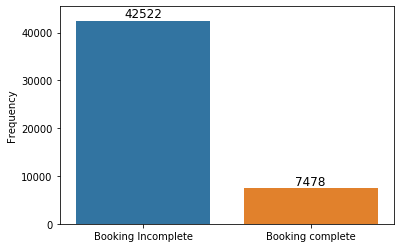

In [9]:
#investigate the rate of booking completion
ax = sns.barplot(x=["Booking Incomplete","Booking complete"], y = df['booking_complete'].value_counts(), )
ax.set_ylim(0,45500)
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

So we can see the vast majority (85%) of bookings do not end in completion

In [24]:
#performing some more checks and adjustments to the data (if necessary)
df['sales_channel'].unique()
df['trip_type'].unique()
df['route'].unique()


#all these variable need to be transformed to numerical values
#because 'trip type', 'route' and 'booking origin' are all non-binary, we'll use one hot encoding to assign numerical values to each of the values

one_hot_enc = pd.get_dummies(data=df, columns=['sales_channel','trip_type','booking_origin'], dtype = float)
one_hot_enc = one_hot_enc.drop(['route'], axis=1)
one_hot_enc.head()




,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,booking_origin_East Asia,booking_origin_Europe,booking_origin_Middle East,booking_origin_Nordic,booking_origin_North America,booking_origin_Oceania,booking_origin_South America,booking_origin_South Asia,booking_origin_South East Asia,booking_origin_Unknown
0,2,262,19,7,6,1,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,112,20,3,6,0,0,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,243,22,17,3,1,1,0,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,96,31,4,6,0,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2,68,22,15,3,1,0,1,5.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split

#moving booking_compete to the 0 index column for ease
column_to_move = one_hot_enc.pop("booking_complete")
one_hot_enc.insert(0, "booking_complete", column_to_move)

X = one_hot_enc.iloc[:,1:]
y = one_hot_enc['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 100)

#making the RandomForest model

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state = 100, max_features='sqrt')
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)

#evaluating performance
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))



accuracy:  0.85
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.49      0.11      0.17      1496

    accuracy                           0.85     10000
   macro avg       0.68      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



We can see from the report above that the model has 85% accuacy overall but the performance for confirmed bookings is terrible (53%). Next, check what the most important features were and try and refine the model

In [26]:
#checking to see the most important features

feature_imp = pd.Series(forest.feature_importances_, index=one_hot_enc.columns.values[1:]).sort_values(ascending=False)
most_imp = feature_imp[:11]

top_half_features = feature_imp[:(len(feature_imp)//2)]


No handles with labels found to put in legend.


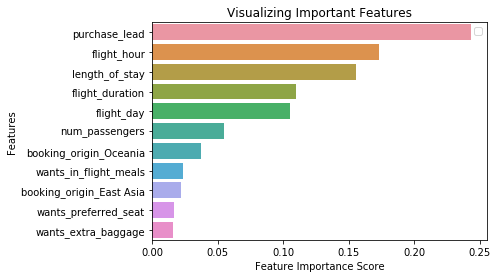

In [27]:
#visualizing the most important features

import matplotlib.pyplot as plt
import seaborn as sns
# Creating a bar plot
sns.barplot(x=most_imp, y=most_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [21]:
#so running the model again but only using these top 10 features to see what the effect is.
most_imp_indexes = most_imp.index
rel_indexes = [one_hot_enc.columns.get_loc(col) for col in most_imp_indexes.tolist()]
print(rel_indexes)

[2, 4, 3, 5, 1, 9, 865, 8, 818, 6, 7]


In [22]:
X2 = one_hot_enc.iloc[:, rel_indexes]
y2 = one_hot_enc['booking_complete']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2, test_size=0.2, random_state = 100)

#making the RandomForest model

forest2 = RandomForestClassifier(n_estimators = 100, random_state = 100, max_features=10)
forest2.fit(X2_train, y2_train)
predictions2 = forest2.predict(X2_test)

#evaluating performance

print("accuracy: ", metrics.accuracy_score(y2_test, predictions2))
print(metrics.classification_report(y2_test, predictions2))

accuracy:  0.8452
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8504
           1       0.44      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.65      0.55      0.55     10000
weighted avg       0.80      0.85      0.81     10000



So using only the 10 most important features actually decreases the accuracy slightly to 84%. Next, we'll try getting rid of unimportant features i.e. the lowest 50% and see what effect it has.

In [23]:
top_imp_indexes = top_half_features.index
rel_indexes_top = [one_hot_enc.columns.get_loc(col) for col in top_imp_indexes.tolist()]

X3 = one_hot_enc.iloc[:, rel_indexes_top]
y3 = one_hot_enc['booking_complete']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, stratify=y3, test_size=0.2, random_state = 100)

#making the RandomForest model

forest3 = RandomForestClassifier(n_estimators = 100, random_state = 100)
forest3.fit(X3_train, y3_train)
predictions3 = forest3.predict(X3_test)

#evaluating performance

print("accuracy: ", metrics.accuracy_score(y3_test, predictions3))
print(metrics.classification_report(y3_test, predictions3))

accuracy:  0.8526
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8504
           1       0.53      0.14      0.22      1496

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.81     10000



Again, it doesn't really affect the performance of the model. So will do cross validation on the model to try and improve the accuracy the results.

In [24]:
#performing cross validation

from sklearn.model_selection import cross_val_score

model_scores = cross_val_score(forest, X, y, cv=5, scoring='accuracy')
print(model_scores)

[0.84891511 0.76292371 0.7058     0.50085009 0.75657566]


In [25]:
print('mean score: ',model_scores.mean(), ' standard deviation: ', model_scores.std())


mean score:  0.7150129117385291  standard deviation:  0.11653608762432359


The cross validated accuracy is only 70%. Next, will try using stratified cross validation to separate my data. This is likely because there is an imbalance in the data between non-compelete bookings and completed bookings

In [70]:
from sklearn.model_selection import StratifiedKFold

accuracy = []

skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X,y):
    print("train:", train_index, "validation:", test_index)
    X4_train, X4_test = X.iloc[train_index], X.iloc[test_index]
    y4_train, y4_test = y.iloc[train_index], y.iloc[test_index]

    forest.fit(X4_train,y4_train)
    prediction4 = forest.predict(X4_test)
    score = metrics.accuracy_score(prediction4, y4_test)
    accuracy.append(score)

print(accuracy)


train: [ 9528  9529  9530 ... 49997 49998 49999] validation: [    0     1     2 ... 15271 15273 15274]
train: [    0     1     2 ... 49997 49998 49999] validation: [ 9528  9529  9530 ... 26678 26679 26683]
train: [    0     1     2 ... 49997 49998 49999] validation: [19200 19201 19202 ... 34884 34888 34898]
train: [    0     1     2 ... 49997 49998 49999] validation: [28881 28882 28885 ... 42611 42629 42636]
train: [    0     1     2 ... 42611 42629 42636] validation: [39282 39283 39284 ... 49997 49998 49999]
[0.8495150484951505, 0.7597240275972402, 0.6855, 0.5099509950995099, 0.7631763176317632]


In [72]:
accuracy = np.array(accuracy)
print(accuracy.mean())

0.7135732777647328


Achieve the same accuracy even with the stratified approach.